In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
import pandas as pd 
import sys
%matplotlib inline
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + mpl.__version__)

Python version 3.7.2 (default, Jan  3 2019, 09:14:01) 
[GCC 8.2.1 20181215 (Red Hat 8.2.1-6)]
Pandas version 0.24.0
Matplotlib version 3.0.2


In [78]:
filepath = 'output.csv'
df = pd.read_csv(filepath)
df['strategy'] = df['strategy'].map(lambda name : name.split('.')[1].lower())
df['sample'] = df['sample'].map(lambda name : name.split('.')[0])
df.head()

,sample,hardware_type,file_system,strategy,split_time,merge_time,config_file
0,bigBrainSample0,NaN,tmpfs,clustered,8.346149,22.852410,config.json
1,bigBrainSample0,hdd,ext4,clustered,38.429100,46.021617,config.json
2,bigBrainSample0,NaN,tmpfs,multiple,12.700467,28.388806,config.json
3,bigBrainSample0,hdd,ext4,multiple,42.789440,52.074896,config.json
4,bigBrainSample0,NaN,tmpfs,naive,19.527108,16.887440,config.json


# variation inter-samples, by strategy, on tmpfs

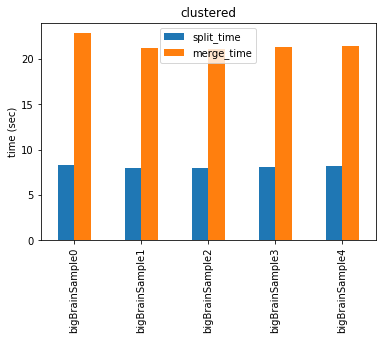

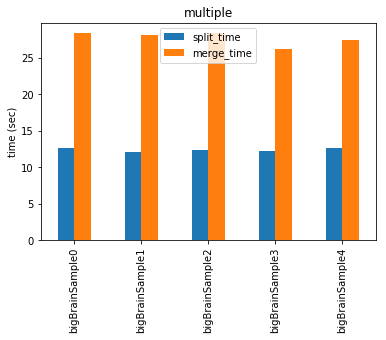

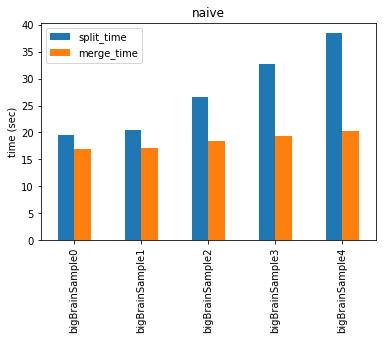

In [76]:
tmpfs=df[df['file_system'] == 'tmpfs']

def plotByStrategy(strategyName, df_fs):
    df_fs=df_fs[df_fs['strategy'] == strategyName]
    ax = (df_fs[['split_time','merge_time']]).plot(kind='bar', title=strategyName)
    ax.set_xticklabels(df_fs['sample'])
    ax.set_ylabel("time (sec)")
    
plotByStrategy('clustered', tmpfs)
plotByStrategy('multiple', tmpfs)
plotByStrategy('naive', tmpfs)

# variation inter-samples, by strategy, on hdd

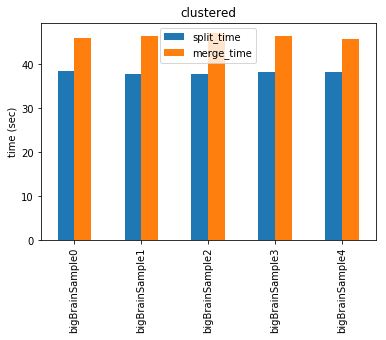

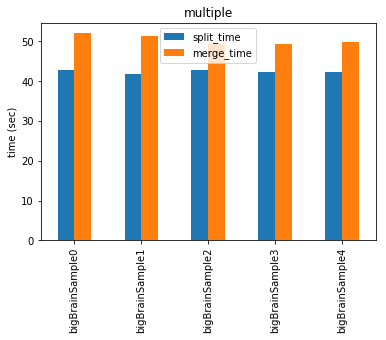

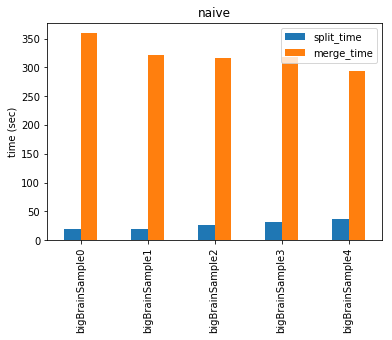

In [82]:
hdd=df[df['hardware_type'] == 'hdd']
plotByStrategy('clustered', hdd)
plotByStrategy('multiple', hdd)
plotByStrategy('naive', hdd)